# Rossmann销售预测
Kaggle项目地址：https://www.kaggle.com/c/rossmann-store-sales

## 1.数据分析

### 导入数据、

In [1]:
import py.visulization as vs
%matplotlib inline

data = vs.load_data()

### 可视化分析

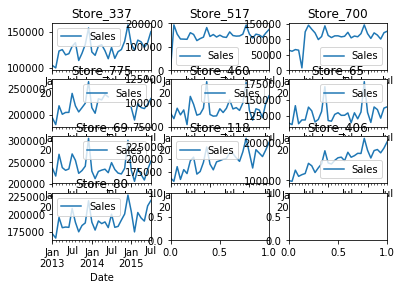

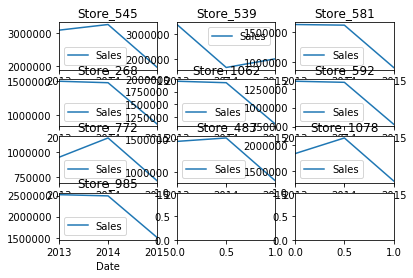

In [2]:
# Take 10 random stores to view the sales by dates, monthly & yearly view
vs.viewSalesDataOverTime(data,"M",size =10)
vs.viewSalesDataOverTime(data,"A",size =10)

## 2.基准模型

## BP神经网络的实现
### 数据预处理

In [47]:
# Load data
import py.helper as helper
import pandas as pd
import numpy as np
import datetime

# Sales Data
all_data_file = "./data/train.csv"
data = pd.read_csv(all_data_file, dtype={"StateHoliday":np.str},
                  parse_dates=['Date'])
# Format Sales data
data.drop(['DayOfWeek'],axis = 1, inplace = True)
data.fillna('0')


# Store info data
def date_parse(dates):
    #helper.debug(dates)
    date_time = str(dates).split(" ")
    #helper.debug(date_time)
    if(date_time[0] == 'nan'):
        date_time[0] = '2018'
        date_time[1] = '01'
    
    return pd.datetime.strptime("{0} {1} 01".format(date_time[0], date_time[1]),'%Y %m %d')


store_info_file = "./data/store.csv"
store_info = pd.read_csv(store_info_file, index_col = "Store", 
                         usecols = ["Store","StoreType", "Assortment","CompetitionDistance"
                                  , "CompetitionOpenSinceYear","CompetitionOpenSinceMonth"],
                         parse_dates = {'CS':['CompetitionOpenSinceYear','CompetitionOpenSinceMonth']},
                        date_parser= date_parse)
store_info.fillna('0')


print (data[:5])
print type(data.iloc[0,1])

print store_info[:3]
print type(store_info.iloc[0,0])

grouped = data.groupby(data['Date'].apply(lambda x:x.month))
print grouped
#grouped.aggregate(np.sum)

   Store       Date  Sales  Customers  Open  Promo StateHoliday  SchoolHoliday
0      1 2015-07-31   5263        555     1      1            0              1
1      2 2015-07-31   6064        625     1      1            0              1
2      3 2015-07-31   8314        821     1      1            0              1
3      4 2015-07-31  13995       1498     1      1            0              1
4      5 2015-07-31   4822        559     1      1            0              1
<class 'pandas.tslib.Timestamp'>
              CS StoreType Assortment  CompetitionDistance
Store                                                     
1     2008-09-01         c          a               1270.0
2     2007-11-01         a          a                570.0
3     2006-12-01         a          a              14130.0
<class 'pandas.tslib.Timestamp'>


# Temp

In [21]:
import datetime
import pandas as pd
import numpy as np
import time as tm

time = datetime.date(2017,8,9)

print(time)
print(type(time))

time2 = tm.strptime("2017-08-08","%Y-%m-%d")
print(type(time2))
print(time2)
print(time2.tm_year)

print "{0} {1} 01".format('2018','02')

2017-08-09
<type 'datetime.date'>
<type 'time.struct_time'>
time.struct_time(tm_year=2017, tm_mon=8, tm_mday=8, tm_hour=0, tm_min=0, tm_sec=0, tm_wday=1, tm_yday=220, tm_isdst=-1)
2017
2018 02 01


In [28]:
import datetime
import pandas as pd
import numpy as np

%matplotlib inline

# Sales Data
all_data_file = "./data/train.csv"
data = pd.read_csv(all_data_file, dtype={"StateHoliday":np.str},
                  parse_dates=['Date'])
# Format Sales data
data.drop(['DayOfWeek'],axis = 1, inplace = True)
data.fillna('0')

,Store,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,2015-07-31,5263,555,1,1,0,1
1,2,2015-07-31,6064,625,1,1,0,1
2,3,2015-07-31,8314,821,1,1,0,1
3,4,2015-07-31,13995,1498,1,1,0,1
4,5,2015-07-31,4822,559,1,1,0,1
5,6,2015-07-31,5651,589,1,1,0,1
6,7,2015-07-31,15344,1414,1,1,0,1
7,8,2015-07-31,8492,833,1,1,0,1
8,9,2015-07-31,8565,687,1,1,0,1
9,10,2015-07-31,7185,681,1,1,0,1


             Sales
Date              
2013-01-31  115171
2013-02-28  111114
2013-03-31  130525
2013-04-30  116878
2013-05-31  116379
2013-06-30  115871
2013-07-31  138778
2013-08-31  125163
2013-09-30  119081
2013-10-31  120362
2013-11-30  128628
2013-12-31  150214
2014-01-31  122249
2014-02-28  114449
2014-03-31  125031
2014-04-30  122853
2014-05-31  118629
2014-06-30  122758
2014-07-31  132209
2014-08-31  120952
2014-09-30  128828
2014-10-31  121397
2014-11-30  132657
2014-12-31  154420
2015-01-31  127498
2015-02-28  114078
2015-03-31  134574
2015-04-30  121012
2015-05-31  115535
2015-06-30  132800
2015-07-31  133765


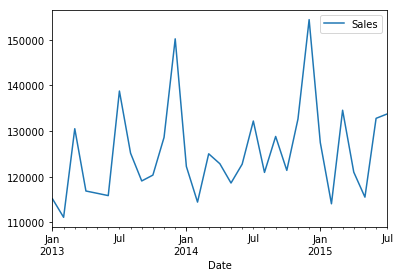

In [45]:


data.sort_values("Date", ascending= True)
data2 = data[data.Store == 2]
#print(data2)
simple_data = data2.drop(['Store','Customers','Open','Promo','SchoolHoliday','StateHoliday'],axis=1)
date_col = simple_data['Date']
simple_data.index = date_col
simple_data = simple_data.resample('M').sum()
print(simple_data)
simple_data.plot(kind='line',x=simple_data.index,y='Sales')